# **빅데이터분석프로그래밍**
> 11주차 O반

# 파이썬 설치 확인

In [ ]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


# 코랩에서 한글 처리

In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.0 MB/s eta 0:00:00


## 그래프 설정

In [ ]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [ ]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

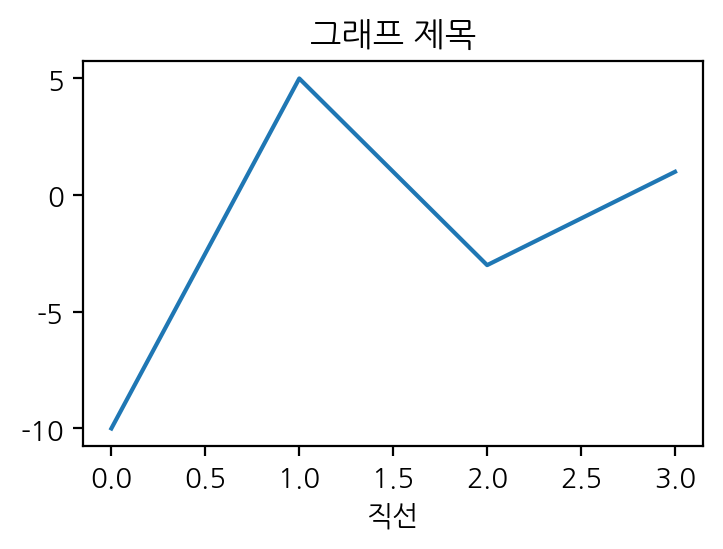

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 깃에서 복사
- https://github.com/ai7dnn/data.git

> #### 수업에서 파일 사용 시
> - 현재 하부 폴더: data
> - 파일: data/파일이름

In [ ]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 46 (delta 7), reused 7 (delta 1), pack-reused 0
Receiving objects: 100% (46/46), 4.59 MiB | 5.31 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


## 데이터프레임 가로로 여러 개 출력하기

In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [ ]:
display_side_by_side(exam.head(), exam[['id', 'math', 'english']].head())

id 
 nclass 
 math 
 english 
 science 
 
 
 
 
 0 
 1 
 1 
 50 
 98 
 50 
 
 
 1 
 2 
 1 
 60 
 97 
 60 
 
 
 2 
 3 
 1 
 45 
 86 
 78 
 
 
 3 
 4 
 1 
 30 
 98 
 58 
 
 
 4 
 5 
 2 
 25 
 80 
 65 
 
 
      
 
 
 
 id 
 math 
 english 
 
 
 
 
 0 
 1 
 50 
 98 
 
 
 1 
 2 
 60 
 97 
 
 
 2 
 3 
 45 
 86 
 
 
 3 
 4 
 30 
 98 
 
 
 4 
 5 
 25 
 80

# **다섯째마당. 데이터 과학의 세계**
---
---

## [통계적 추론(統計的 推論, statistical inference) 또는 추론 통계](https://ko.wikipedia.org/wiki/%ED%86%B5%EA%B3%84%EC%A0%81_%EC%B6%94%EB%A1%A0)
- 모집단에 대한 어떤 미지의 양상을 알기 위해 통계학을 이용하여 추측하는 과정
- 통계학의 한 부분으로서 추론 통계학(Inferential statistics)이라고 불린다. 이것은 기술 통계학(descriptive statistics)과 구별되는 개념이다.
- 모집단에 대한 추론을 100% 확신하기 위해서는 모집단 전체를 표본으로 조사해야 한다. 그러나 경제성 또는 시간 또는 양적접근의 한계 등의 이유로 불가능한 경우가 많기 때문에 표본에서 얻은 정보를 가지고 추론한다.

#### 통계추론은 추정(estimation)과 가설검정(testing hypothesis)으로 나눌 수 있다.
- 추정(estimation):  표본을 통해 모집단 특성이 어떠한가에 대해 추측하는 과정
    - 표본평균 계산을 통해 모집단평균을 추측해보거나, 모집단 평균에 대한 95% 신뢰구간의 계산 과정을 나타낸다.
- 가설검정(testing hypothesis): 모집단 실제값이 얼마나 되는가 하는 주장과 관련해서, 표본이 가지고 있는 정보를 이용해 가설이 올바른지 그렇지 않은지 판정하는 과정을 나타낸다.

## 기술통계와 추론통계
- 기술 통계: 데이터를 요약해 설명하는 통계 분석 기법
    - `직장의 월급 평균 계산`
- 추론 통계: 어떠한 것이 발생할 확률을 계산하는 통계 분석 기법
    - `성별에 따라 월급이 차이가 있는 경우, 이런 차이가 우연히 나타날 확률`을 계산
    - 만일 위 확률이 작다면
        - ```성별에 따른 월급차이가 통계적으로 유의(statistically significant)하다```라고 결론
    - 반대로 위 확률이 크다면
        - ```성별에 따른 월급차이가 통계적으로 유의하지 않다```라고 결론

## 통계적 가설 검정(statistical hypothesis test) 용어
- 귀무가설(null hypothesis)
    - 모집단이 어떠한 특징을 지닐 것으로 여겨지는 가설로서 일반적으로 ‘차이가 없다’, ‘같다’(=) 기호를 사용하여 나타낼 수 있는 가설로 흔히 H0로 나타낸다.
    - 귀무가설은 실험이나 연구를 통해 기각하고자 하는 가설로, H0로 표시한다. - - 대립가설과 상반되며 귀무가설의 기각을 통해 입증하고자 하는 주장을 관철할 수 있다.
- 대립가설(alternative hyphthesis)
    - 대립가설이란 귀무가설에 반대되는 가설로, 귀무가설이 틀렸다고 판단될 경우 채택되는 가설로 H1으로 나타낸다.
    - 대립가설은 실험이나 연구를 통해 증명하고자 하는 새로운 아이디어 혹은 가설에 해당한다.

#### 통계적 가설 검정에서 두집단의 평균에 차이가 있는지 검정하는 t 검정(t-test)
- 유의확률(significance probability, asymptotic significance) 또는 p-value(probability value)
    - 실제로는 집단 간의 차이가 없는(귀무가설)데 우연히 차이가 있는 데이터가 추출될 확률   
    - 귀무가설이 맞다고 가정할 때 얻은 결과보다 극단적인 결과가 관측될 확률

> - p-vaule < 0.05
>    - 우연히 차이가 있는 데이터가 추출될 확률이 매우 작다
>    - 그러니 모집단은 차이가 있는 데이터이다.
>    - 귀무가설을 기각하고 대립가설을 채택

# 14 통계 분석 기법을 이용한 가설 검정

## 14-1 가설 검정이란?

## 14-2 t 검정 - 두 집단의 평균 비교하기

### compact 자동차와 suv 자동차의 도시 연비 t 검정

In [ ]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [ ]:
## 기술 통계 분석

# compact, suv 추출하기
# category별 분리
# 빈도 구하기
# cty 평균 구하기
mpg.query('category in ["compact", "suv"]') \
   .groupby('category', as_index = False) \
   .agg(n    = ('category', 'count'),
        mean = ('cty', 'mean'))

,category,n,mean
0,compact,47,20.13
1,suv,62,13.50


In [ ]:
compact = mpg.query('category == "compact"')['cty']
suv = mpg.query('category == "suv"')['cty']

In [ ]:
compact[:10], suv[:10]

(0    18
 1    21
 2    20
 3    21
 4    16
 5    18
 6    18
 7    18
 8    16
 9    20
 Name: cty, dtype: int64,
 18    14
 19    11
 20    14
 21    13
 22    12
 28    14
 29    11
 30    11
 31    14
 57    13
 Name: cty, dtype: int64)

In [ ]:
len(compact)

47

In [ ]:
# 독립(independent) 표본 t-test
from scipy import stats
stats.ttest_ind(compact, suv, equal_var = True)

TtestResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21, df=107.0)

### 일반 휘발유와 고급 휘발유의 도시 연비 t 검정

In [ ]:
## 기술 통계 분석

# r, p 추출하기
# fl별 분리
# 빈도 구하기
# cty 평균 구하기
mpg.query('fl in ["r", "p"]') \
   .groupby('fl', as_index = False) \
   .agg(n    = ('category', 'count'),
        mean = ('cty', 'mean'))

,fl,n,mean
0,p,52,17.37
1,r,168,16.74


In [ ]:
regular = mpg.query('fl == "r"')['cty']
premium = mpg.query('fl == "p"')['cty']

In [ ]:
# t-test
stats.ttest_ind(regular, premium, equal_var = True)

TtestResult(statistic=-1.066182514588919, pvalue=0.28752051088667036, df=218.0)

In [ ]:
import scipy.stats as stats

# 두 독립적인 샘플 데이터
sample1 = [1.1, 2.2, 3.3, 4.4, 5.5]
sample2 = [2.1, 3.2, 4.3, 5.4, 6.5]

# 독립 표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

print(f"T-Statistic: {t_statistic}, P-Value: {p_value}")

T-Statistic: -0.9090909090909091, P-Value: 0.3898678691227211


In [ ]:
a, b = stats.ttest_ind(sample1, sample2)
b

0.3898678691227211

## 14-3 상관분석 - 두 변수의 관계 분석하기

### 실업자 수와 개인 소비 지출의 상관관계

#### 1. 상관계수 구하기

In [ ]:
# economics 데이터 불러오기
economics = pd.read_csv('data/economics.csv')

# 상관행렬 만들기, 실업자수(unemploy), 개인소비지출(pce)
economics[['unemploy', 'pce']].corr()

,unemploy,pce
unemploy,1.00,0.61
pce,0.61,1.00


#### 2. 유의확률 구하기

In [ ]:
# 상관분석
stats.pearsonr(economics['unemploy'], economics['pce'])

PearsonRResult(statistic=0.614517614193208, pvalue=6.773527303289964e-61)

- 실업자 수와 개인소비지출의 상관관계가 통계적으로 유의하다고 결론

### 상관행렬 히트맵 만들기

#### 1. 상관행렬 만들기

In [ ]:
mtcars = pd.read_csv('data/mtcars.csv')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.62,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.88,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.21,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2


In [ ]:
car_cor = mtcars.corr()      # 상관행렬 만들기
car_cor = round(car_cor, 2)  # 소수점 둘째 자리까지 반올림
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


#### 2. 히트맵 만들기

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '120',           # 해상도 설정
                     'figure.figsize': [7, 4]})  # 가로 세로 크기 설정

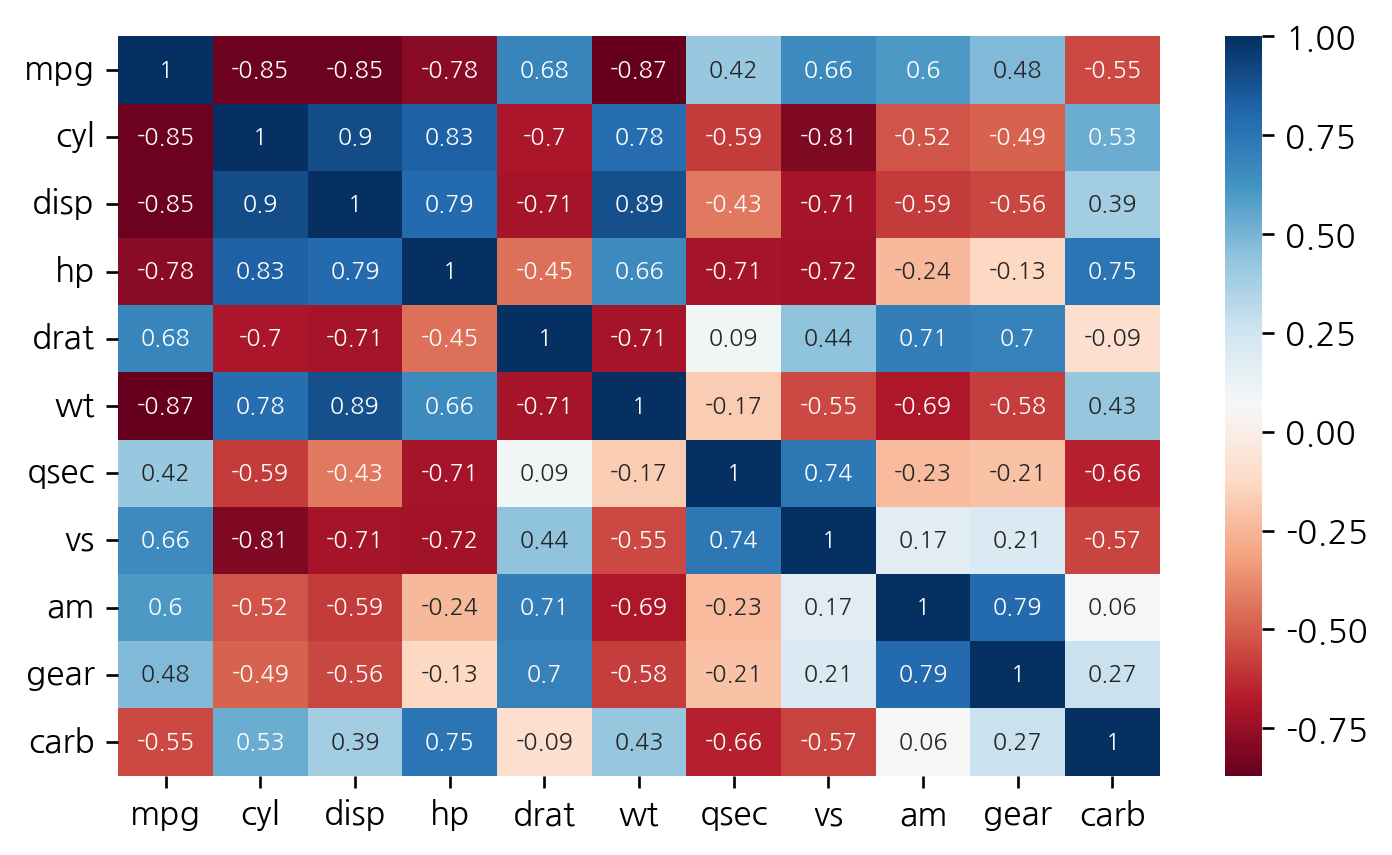

In [ ]:
# 히트맵 만들기
import seaborn as sns
sns.heatmap(car_cor,
            annot = True,   # 상관계수 표시
            annot_kws = {"size": 7},
            cmap = 'RdBu');  # 컬러맵

#### 3. 대각 행렬 제거하기

**(1) mask 만들기**

In [ ]:
# mask 만들기
import numpy as np
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
mask.shape

(11, 11)

In [ ]:
# 오른쪽 위 대각 행렬을 1로 바꾸기
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

**(2) 히트맵에 mask 적용하기**

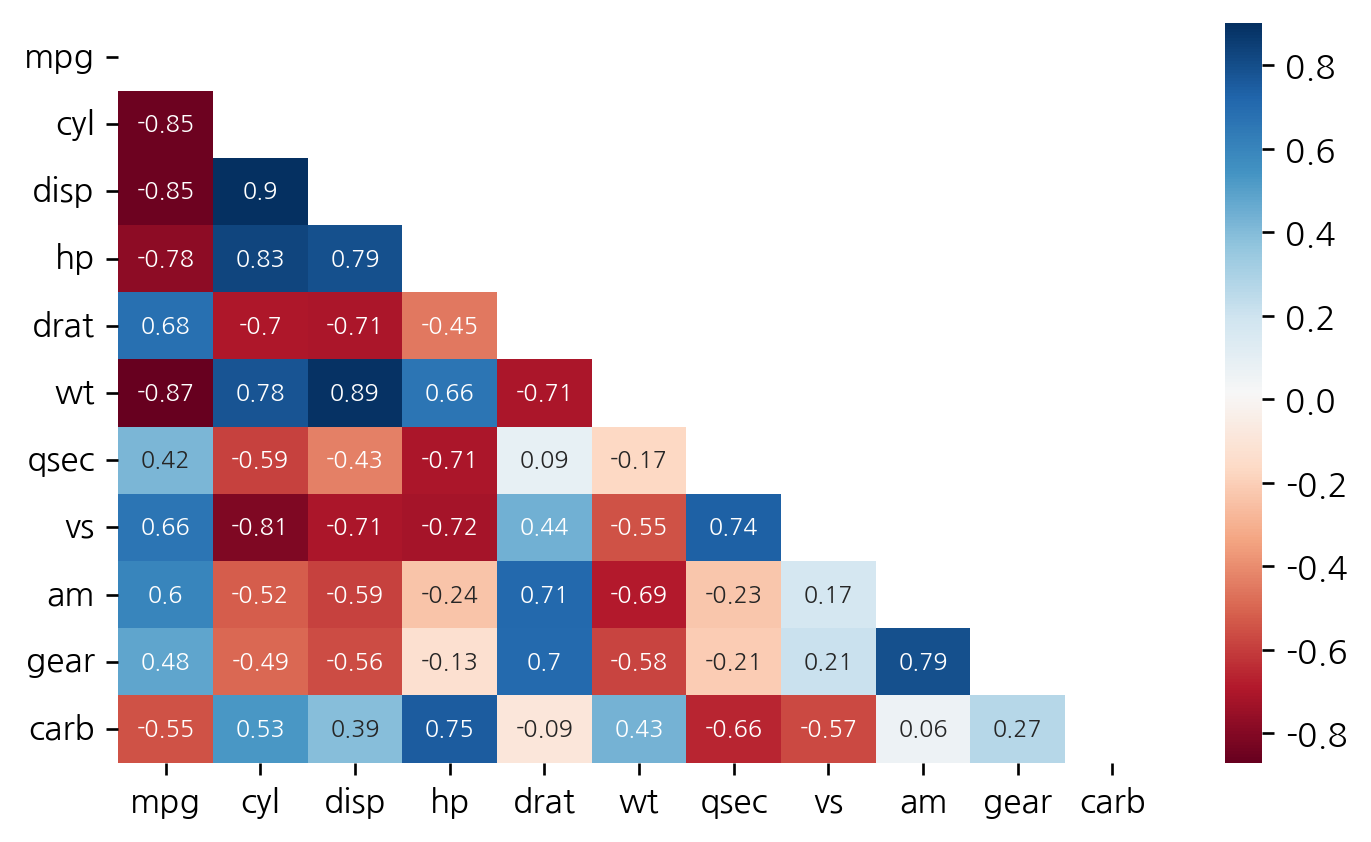

In [ ]:
# 히트맵 만들기
sns.heatmap(data = car_cor,
            annot = True,   # 상관계수 표시
            cmap = 'RdBu',  # 컬러맵
            annot_kws = {"size": 7},
            mask = mask);    # mask 적용


**(3) 빈 행과 열 제거하기**

In [ ]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
mask[1:, :-1]

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
mask_new = mask[1:, :-1]         # mask 첫 번째 행, 마지막 열 제거, 기말시험
cor_new = car_cor.iloc[1:, :-1]  # dataframe 상관행렬 첫 번째 행, 마지막 열 제거
cor_new

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00
carb,-0.55,0.53,0.39,0.75,-0.09,0.43,-0.66,-0.57,0.06,0.27


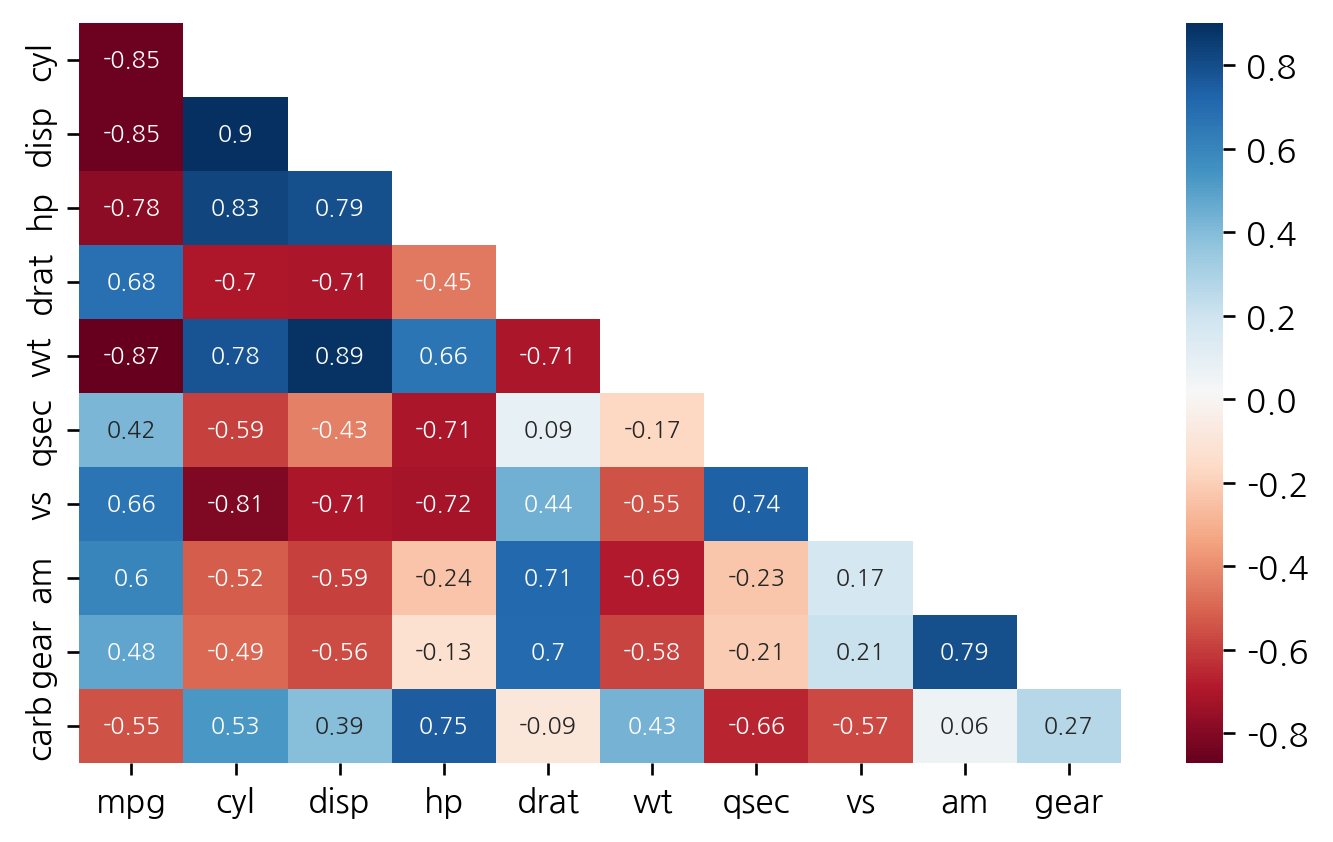

In [ ]:
# 히트맵 만들기
sns.heatmap(data = cor_new,
            annot = True,       # 상관계수 표시
            cmap = 'RdBu',      # 컬러맵
            annot_kws = {"size": 7},
            mask = mask_new);    # mask 적용

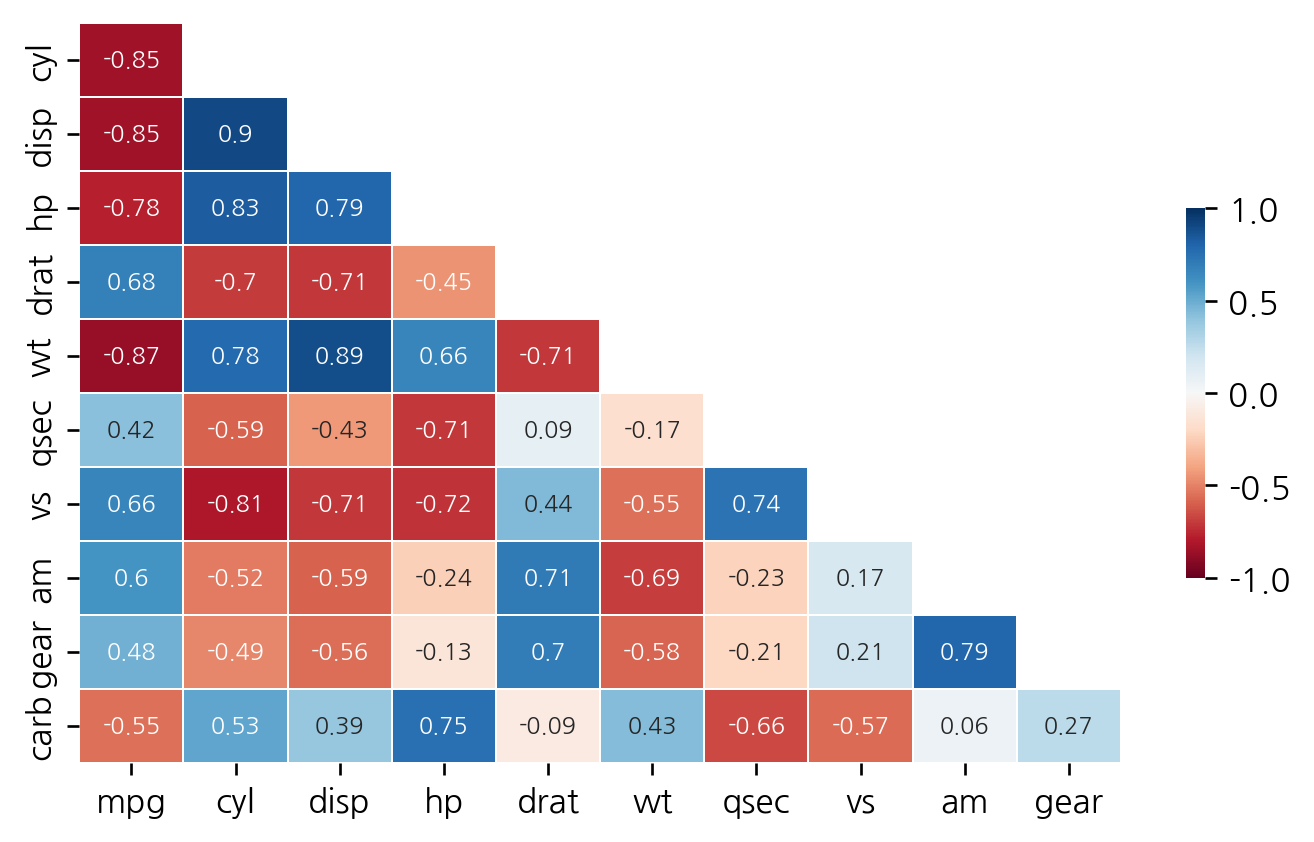

In [ ]:
# 히트맵 만들기
sns.heatmap(data = cor_new,
            annot = True,               # 상관계수 표시
            cmap = 'RdBu',              # 컬러맵
            mask = mask_new,            # mask 적용
            linewidths = .5,            # 경계 구분선 추가
            annot_kws = {"size": 7},
            vmax = 1,                   # 가장 진한 파란색으로 표현할 최대값
            vmin = -1,                  # 가장 진한 빨간색으로 표현할 최소값
            cbar_kws = {'shrink': .5});  # 범례 크기 줄이기

# 15 머신러닝을 이용한 예측 분석

## 15-1 머신러닝 모델 알아보기

## 15-2 소득 예측 모델 만들기

In [ ]:
import pandas as pd
df = pd.read_csv('data/adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 전처리하기

#### 1. 타겟 변수 전처리

In [ ]:
df['income'].value_counts(normalize = True)

income
<=50K    0.76
>50K     0.24
Name: proportion, dtype: float64

In [ ]:
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')
df['income'].value_counts(normalize = True)

income
low     0.76
high    0.24
Name: proportion, dtype: float64

#### 2. 불필요한 변수 제거하기

In [ ]:
df = df.drop(columns = 'fnlwgt')

#### 3. 문자 타입 변수를 숫자 타입으로 바꾸기

**원핫 인코딩하기**

In [ ]:
df_tmp = df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [ ]:
df_tmp['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [ ]:
# df_tmp의 문자 타입 변수에 원핫 인코딩 적용
df_tmp = pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  bool 
 1   sex_Male    48842 non-null  bool 
dtypes: bool(2)
memory usage: 95.5 KB


In [ ]:
df_tmp[['sex_Female', 'sex_Male']].head()

,sex_Female,sex_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False


In [ ]:
target = df['income']             # income 추출

df = df.drop(columns = 'income')  # income 제거
df = pd.get_dummies(df)           # 문자 타입 변수 원핫 인코딩

df['income'] = target             # df에 target 삽입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: bool(102), int64(5), object(1)
memory usage: 7.0+ MB


In [ ]:
import numpy as np
df.info(max_cols = np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  bool  
 6    workclass_Federal-gov                      48842 non-null  bool  
 7    workclass_Local-gov                        48842 non-null  bool  
 8    workclass_Never-worked                     48842 non-null  bool  
 9    workclass_Private                          48842 non-null  bool  
 10   workclass_Self-emp-i

In [ ]:
import numpy as np
df.iloc[:,0:6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   education_num   48842 non-null  int64
 2   capital_gain    48842 non-null  int64
 3   capital_loss    48842 non-null  int64
 4   hours_per_week  48842 non-null  int64
 5   workclass_?     48842 non-null  bool 
dtypes: bool(1), int64(5)
memory usage: 1.9 MB


#### 4. 데이터 분할하기

#### `adult` 데이터 분할하기

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,          # 테스트 세트 비율
                                     stratify = df['income'],  # 타겟 변수 비율 유지
                                     random_state = 1234)      # 난수 고정

In [ ]:
# train
df_train.shape

(34189, 108)

In [ ]:
# test
df_test.shape

(14653, 108)

In [ ]:
# train
df_train['income'].value_counts(normalize = True)

income
low     0.76
high    0.24
Name: proportion, dtype: float64

In [ ]:
# test
df_test['income'].value_counts(normalize = True)

income
low     0.76
high    0.24
Name: proportion, dtype: float64

### 의사결정나무 모델 만들기

#### 모델 설정하기

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,  # 난수 고정
                                  max_depth = 3)        # 나무 깊이

#### 모델 만들기

In [ ]:
train_x = df_train.drop(columns = 'income')  # 예측 변수 추출
train_y = df_train['income']                 # 타겟 변수 추출

model = clf.fit(X = train_x, y = train_y)    # 모델 만들기

### 모델 구조 살펴보기

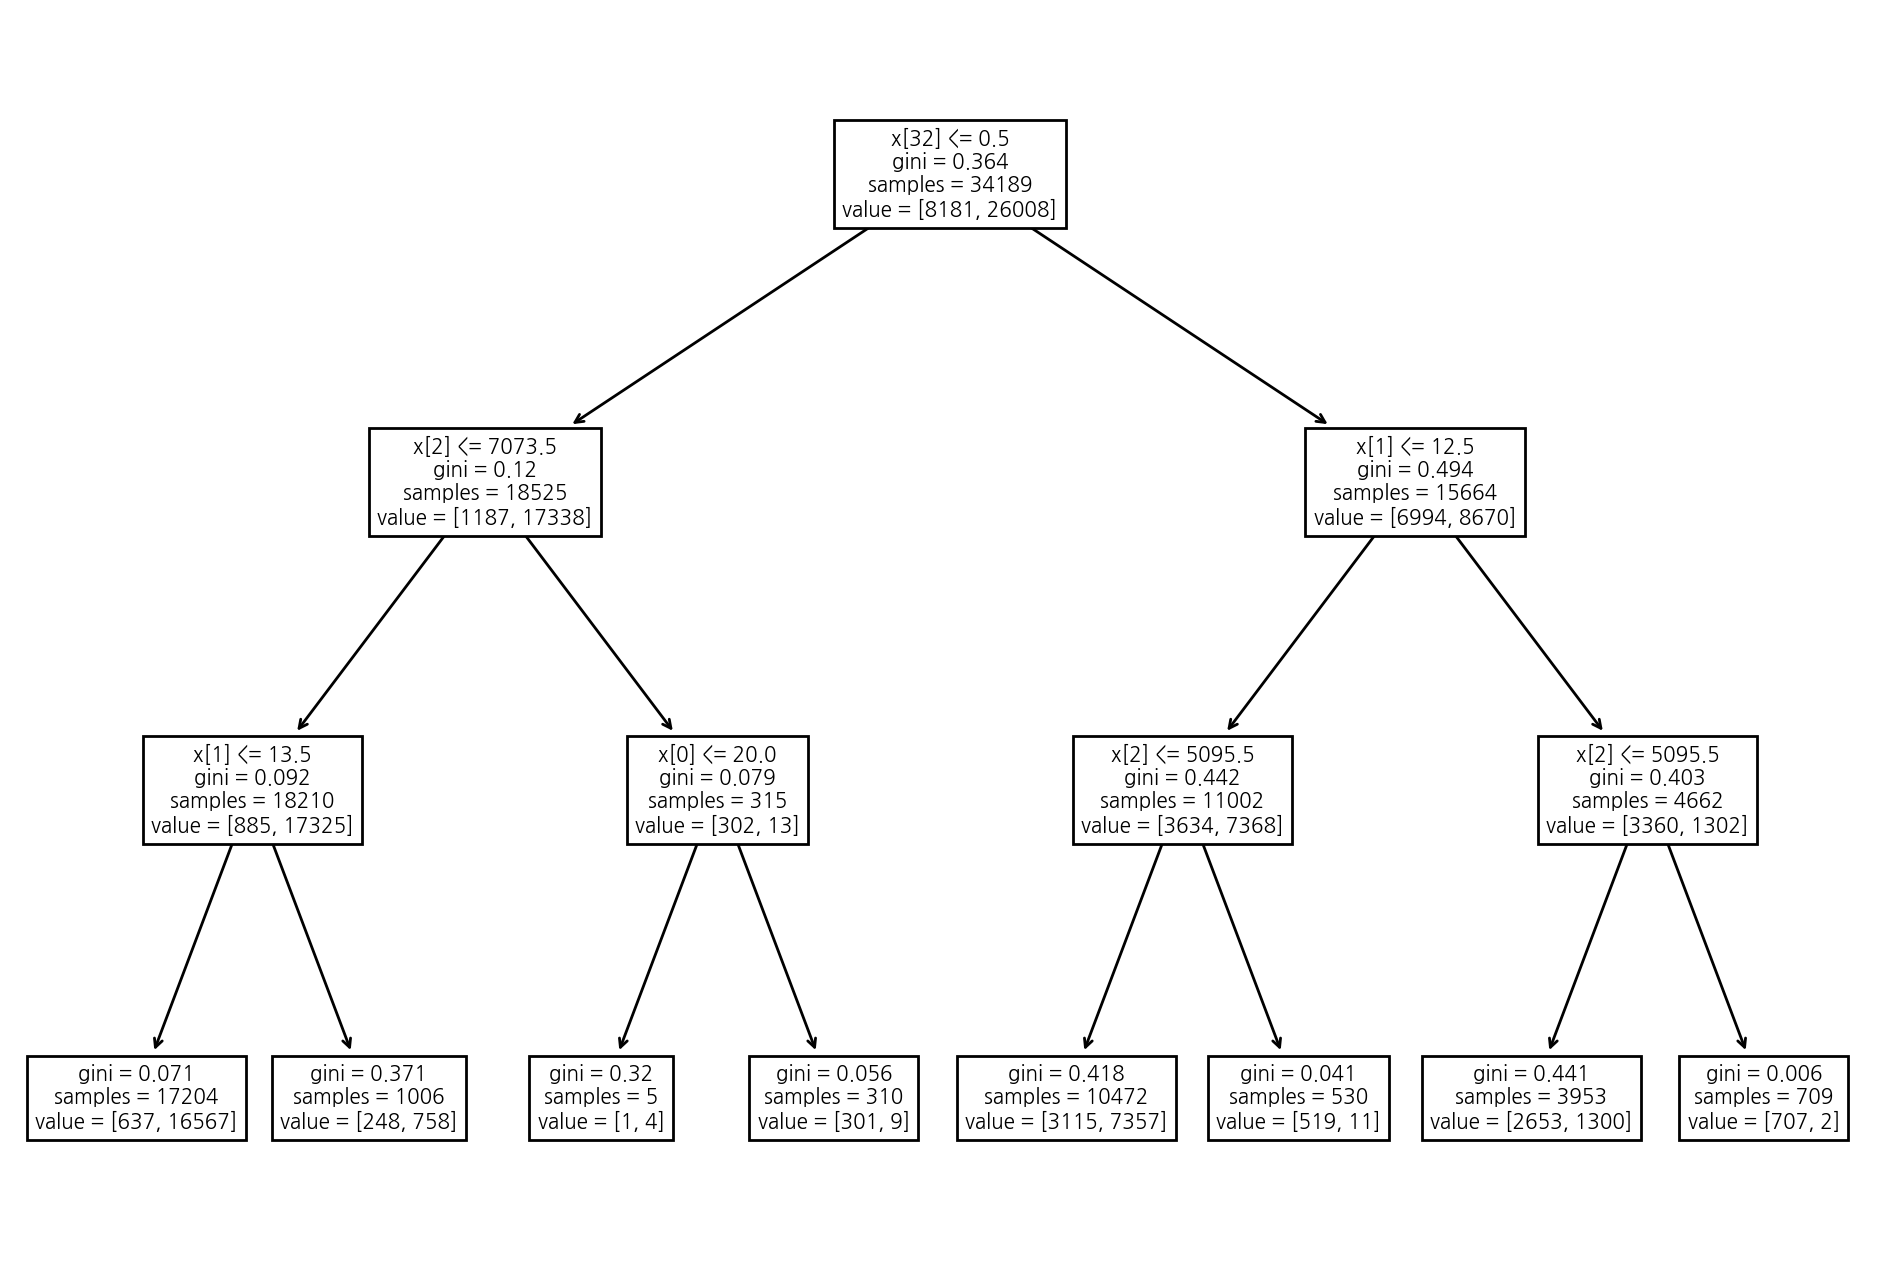

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi'     : '100',     # 그래프 크기 설정
                     'figure.figsize' : [12, 8]})  # 해상도 설정

tree.plot_tree(model);                             # 그래프 출력

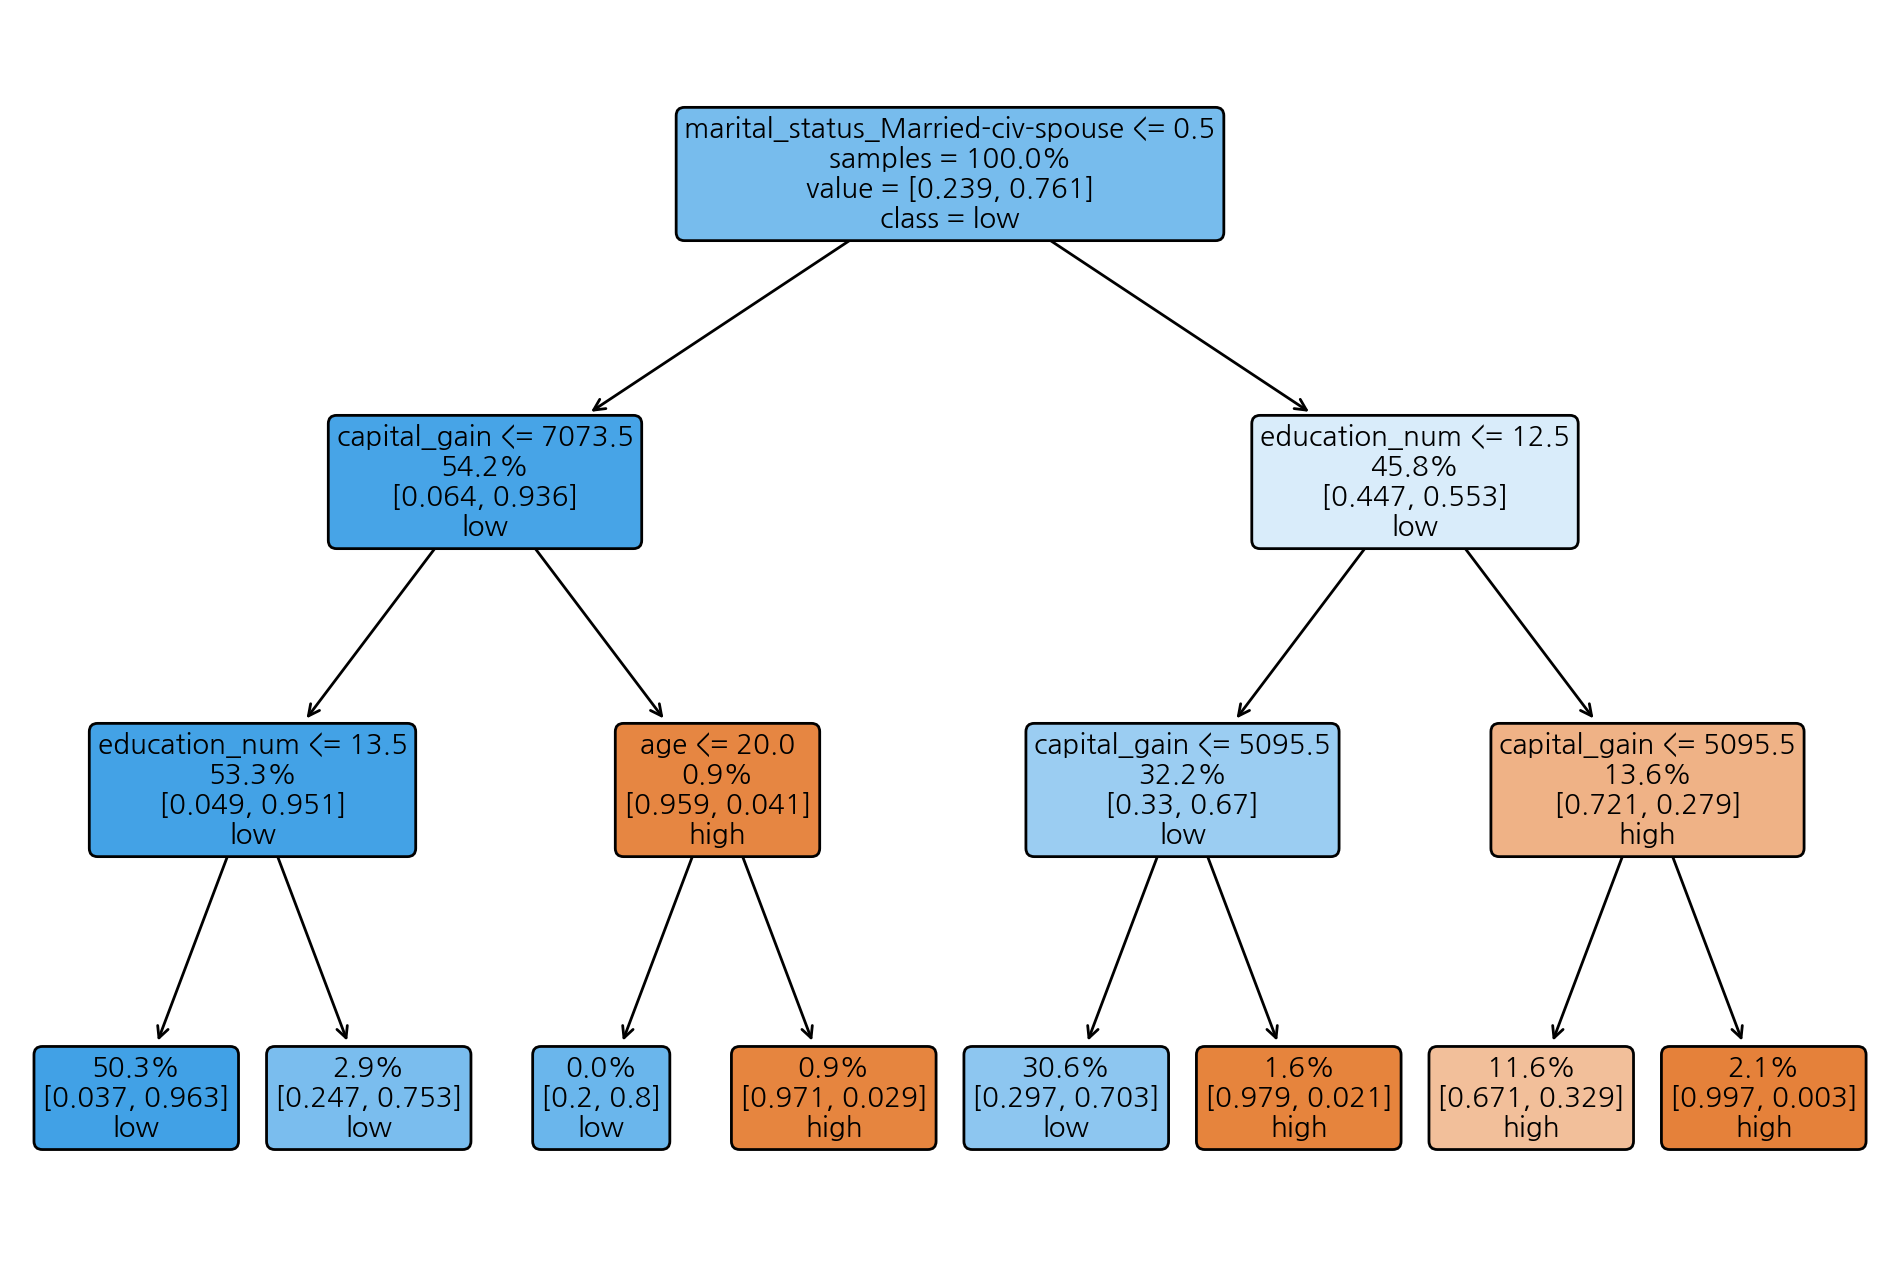

In [ ]:
tree.plot_tree(model,
               feature_names = train_x.columns,  # 예측 변수명
               class_names = ['high', 'low'],    # 타겟 변수 클래스, 알파벳순
               proportion = True,                # 비율 표기
               filled = True,                    # 색칠
               rounded = True,                   # 둥근 테두리
               impurity = False,                 # 불순도 표시
               label = 'root',                   # label 표시 위치
               fontsize = 10);                   # 글자 크기

### 모델을 이용해 예측하기

In [ ]:
test_x = df_test.drop(columns = 'income')  # 예측 변수 추출
test_y = df_test['income']                 # 타겟 변수 추출

In [ ]:
# 예측값 구하기
df_test['pred'] = model.predict(test_x)
df_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,False,False,False,False,False,...,False,False,False,False,False,True,False,False,low,low
24768,39,10,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low
26758,31,4,0,0,20,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
14295,23,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
3683,24,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,24,13,0,0,30,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
48445,35,13,10520,0,45,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,high
19639,41,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,low
21606,29,4,0,0,30,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low
